EJERCICIO 1 

In [27]:
#paquetes 
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline

FUNCIÓN PARA ABRIR ARCHIVOS .TXT 

In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

ABRIMOS LAS 3 REDES 

In [3]:
redInteraccionesBinarias = ldata('yeast_Y2H.txt')
redComplejosProteicos = ldata('yeast_AP-MS.txt')
redLiteratura = ldata('yeast_LIT.txt')

In [4]:
def grafo(datosRed):
    G = nx.Graph()
    for i in range(np.shape(datosRed)[0]):
        G.add_edges_from([(datosRed[i][0],datosRed[i][1])])
    return G 

In [5]:
grafoRedInteraccionesBinarias = grafo(redInteraccionesBinarias)
grafoRedComplejosProteicos = grafo(redComplejosProteicos)
grafoRedLiteratura = grafo(redLiteratura)

EJERCICIO 1 

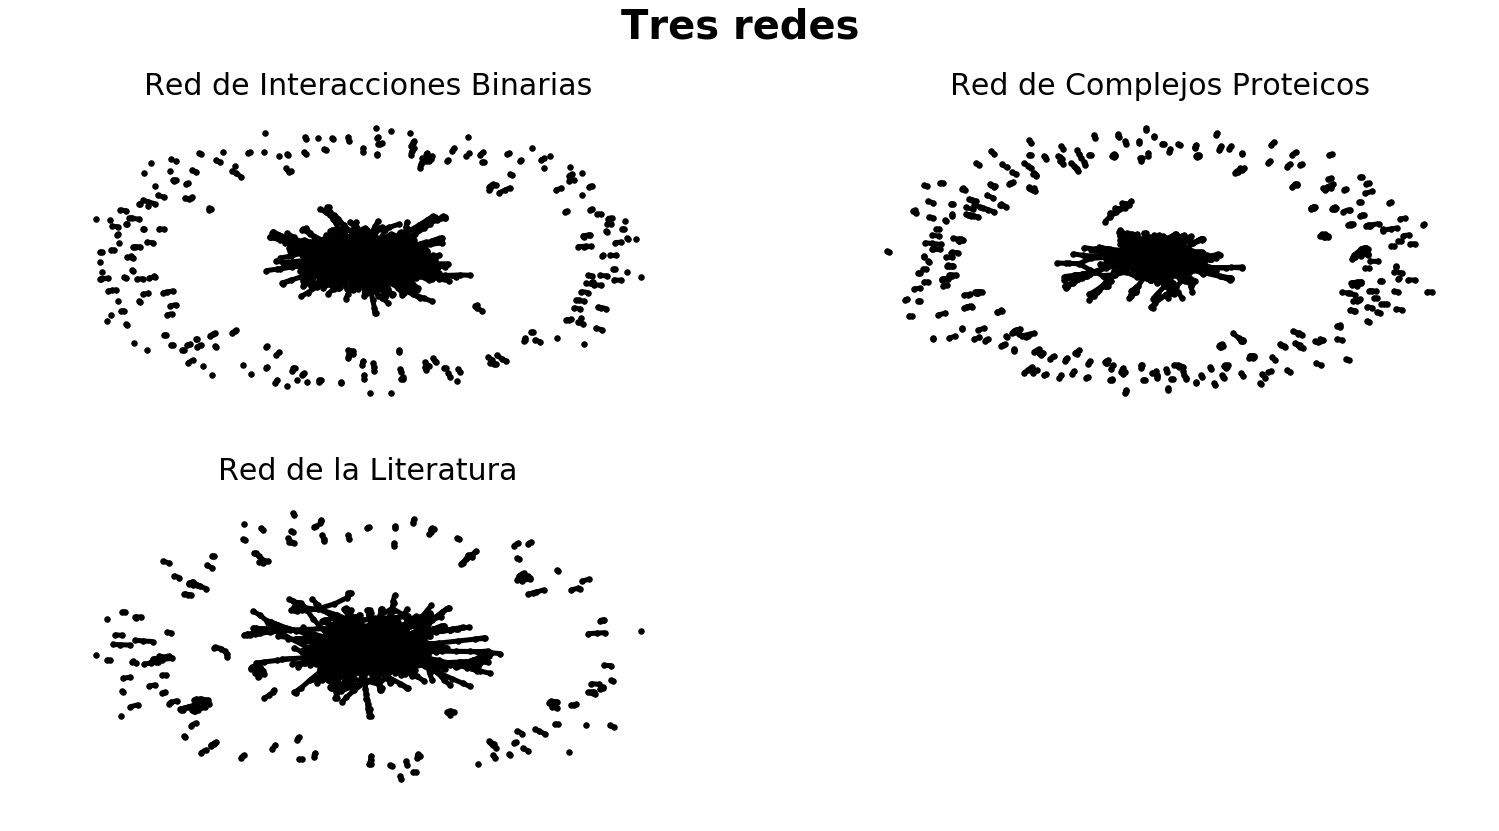

In [6]:
#ponemos estas opciones para que grafique igual en todos los subplots
options = {
     'node_color': 'black',
     'node_size': 30,
     'width': 5,
}

f = plt.figure(figsize=(26,13))                               #con esta linea le damos el tamano a cada subplot
f.suptitle('Tres redes',fontweight="bold", size=40) 
sub1 = f.add_subplot(221)
nx.draw(grafoRedInteraccionesBinarias, **options)
sub2 = plt.subplot(222)
nx.draw(grafoRedComplejosProteicos, **options)
sub3 = plt.subplot(223)
nx.draw(grafoRedLiteratura, **options)
sub1.set_title('Red de Interacciones Binarias', size=30)
sub2.set_title('Red de Complejos Proteicos', size=30)
sub3.set_title('Red de la Literatura', size=30)
plt.show()

NUMERO DE NODOS

In [8]:
nodosInteraccionesBinarias = grafoRedInteraccionesBinarias.number_of_nodes()
nodosComplejosProteicos = grafoRedComplejosProteicos.number_of_nodes()
nodosRedLiteratura = grafoRedLiteratura.number_of_nodes()

print (nodosInteraccionesBinarias, nodosComplejosProteicos, nodosRedLiteratura)

2018 1622 1536


ENLACES 

In [9]:
enlacesInteraccionesBinarias = grafoRedInteraccionesBinarias.number_of_edges()
enlacesComplejosProteicos = grafoRedComplejosProteicos.number_of_edges()
enlacesRedLiteratura = grafoRedLiteratura.number_of_edges()

print (enlacesInteraccionesBinarias, enlacesComplejosProteicos, enlacesRedLiteratura)


2930 9070 2925


DIRIGIDA O NO DIRIGIDA: ESTO SE INTERPRETA POR CONOCIMIENTO DEL PROCESO 
POR EJEMPLO: EN REDES SOCIALES COMO TWITTER O INSTAGRAM PUEDO SEGUIR A ALGUIEN Y QUE ESA PERSONA NO ME SIGA, ENTONCES ES DIRIGIDO. 
EN CASOS DE PROTEINAS ES NO DIRIGIDO PORQUE AMBAS INTERACTUAN ENTRE ELLAS. 


ALGUNOS PARAMETROS DE LAS REDES 

In [171]:
G=grafoRedComplejosProteicos
H=grafoRedInteraccionesBinarias
I=grafoRedLiteratura

como hay dos comunidades no conectadas no puede definir una longitud 

In [113]:
def get_giant(G):
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    G0=Gcc[0]
    return(G0)
    #pos=nx.spring_layout(G0)
    #nx.draw_networkx_edges(G0,pos,
#                            with_labels=False,
#                            edge_color='r',
#                            width=6.0
#                         )

In [116]:
def props(G):
    giant_G=get_giant(G)
    return("diameter: %d" % nx.diameter(giant_G),'density',nx.density(G))

In [120]:
props(G),props(H),props(I)

(('diameter: 15', 'density', 0.006899274397150227),
 ('diameter: 14', 'density', 0.0014396951973635397),
 ('diameter: 19', 'density', 0.002481168566775244))

# CLUSTERING

LOCAL

In [143]:
nx.average_clustering(G),nx.average_clustering(H),nx.average_clustering(I)

(0.5546360657013013, 0.046194001297365166, 0.2924923005815711)

GLOBAL

In [146]:
nx.transitivity(G),nx.transitivity(H),nx.transitivity(I)

(0.6185901626483971, 0.02361415364051535, 0.3461926495315878)

# MEAN DEGREE

In [197]:
#forma rapida y linda
maxdg_G=np.array([j for (i,j) in G.degree]).max()
maxdg_H=np.array([j for (i,j) in H.degree]).max()
maxdg_I=np.array([j for (i,j) in I.degree]).max()

maxdg_G,maxdg_H,maxdg_I

(127, 91, 40)

In [198]:
mindg_G=np.array([j for (i,j) in G.degree]).min()
mindg_H=np.array([j for (i,j) in H.degree]).min()
mindg_I=np.array([j for (i,j) in I.degree]).min()

mindg_G,mindg_H,mindg_I

(1, 1, 1)

In [199]:
mv_G=np.mean(np.array([j for (i,j) in G.degree]))
mv_H=np.mean(np.array([j for (i,j) in H.degree]))
mv_I=np.mean(np.array([j for (i,j) in I.degree]))

mv_G,mv_H,mv_I

(11.183723797780518, 2.9038652130822595, 3.80859375)

## COMENTARIOS

In [196]:
#forma cabeza de iterar en un objeto raro

[(i,j) for (i,j) in H.degree] # este me crea una lista con las truplas que le digo
#como me quiero quedar solo con los degrees, me conviene pedirle los j's:
[(j) for (i,j) in H.degree]
# lo paso a array y despues le pido el maximo
asd=np.array([(j) for (i,j) in H.degree])
asd.max()

91